In [ ]:
import matplotlib.pyplot as plt
plt.style.use('thesis')
import numpy as np
from sklearn.metrics import mean_squared_error

In [1]:
root = "sfh_100_10_20251120_104808"
real = np.vstack(10**(np.load(f"/data/mustard/vmehta/{root}/snr__all_true.npy")))

def load_data(sigma):
    if sigma == None:
        pred = np.vstack(10**(np.load(f"/data/mustard/vmehta/{root}/snr__all_pred.npy")))
    else:
        pred = np.vstack(10**(np.load(f"/data/mustard/vmehta/{root}/snr__all_pred_sigma_{sigma}.npy")))

    return pred

# Bin setup (used in multiple places)
bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

def rmse(pred):
    rmse = np.sqrt(mean_squared_error(real, pred, multioutput='raw_values'))
    overall_rmse = np.sqrt(mean_squared_error(real, pred))
    return rmse, overall_rmse

def plot_diff(pred):
    diff = pred - real

    median = np.median(diff, axis=0)
    sixteen = np.percentile(diff, 16, axis=0)
    eightyfour = np.percentile(diff, 84, axis=0)

    plt.errorbar(bin_centers, median, yerr=[median - sixteen, eightyfour - median], fmt='o', capsize=5)
    return

NameError: name 'np' is not defined

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,4), sharey=True, gridspec_kw={'width_ratios': [2, 1]})

for s in ["0_1", "0_0_1", "0_0_0_1"]:
    pred = load_data(s)
    ax[0].plot(bin_centers, rmse(pred)[0], marker='o')
ax[0].legend(['$\\sigma=0.1$', '$\\sigma=0.01$', '$\\sigma=0.001$'])
ax[0].set_xlabel('$\\log_{10}t_\\mathrm{lookback}$ (years)')
ax[0].set_ylabel('$\\Delta\\ell_\\mathrm{RMSE}$')

ax[1].plot([0.1, 0.01, 0.001], [rmse(load_data("0_1"))[1], rmse(load_data("0_0_1"))[1], rmse(load_data("0_0_0_1"))[1]], 'ko-')
ax[1].set_xscale('log')
ax[1].set_xlabel('$\\sigma$')
ax[1].set_ylabel('$\\Delta\\pmb\\ell_\\mathrm{RMSE}$')

plt.tight_layout()

NameError: name 'plt' is not defined

: 

In [4]:
def plot_hist(data, ax=None, bins=100, focus_percentile=90.0, color='C0', alpha=0.7, density=False, plotmean=True, plotmed=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
    else:
        fig = ax.figure

    data = np.asarray(data)
    data = data[np.isfinite(data)]
    if data.size == 0:
        raise ValueError('data is empty after filtering non-finite values')

    lowp = (100 - focus_percentile) / 2.0
    highp = 100 - lowp
    vmin, vmax = np.percentile(data, [lowp, highp])

    clipped = data[(data >= vmin) & (data <= vmax)]
    ax.hist(clipped, bins=bins, color=color, alpha=alpha, density=density)
    if plotmean:
        ax.axvline(np.mean(data), color='k', linestyle=':', linewidth=1, label='Mean')
    if plotmed:
        ax.axvline(np.median(data), color='k', linestyle='--', linewidth=1, label='Median')

    return ax

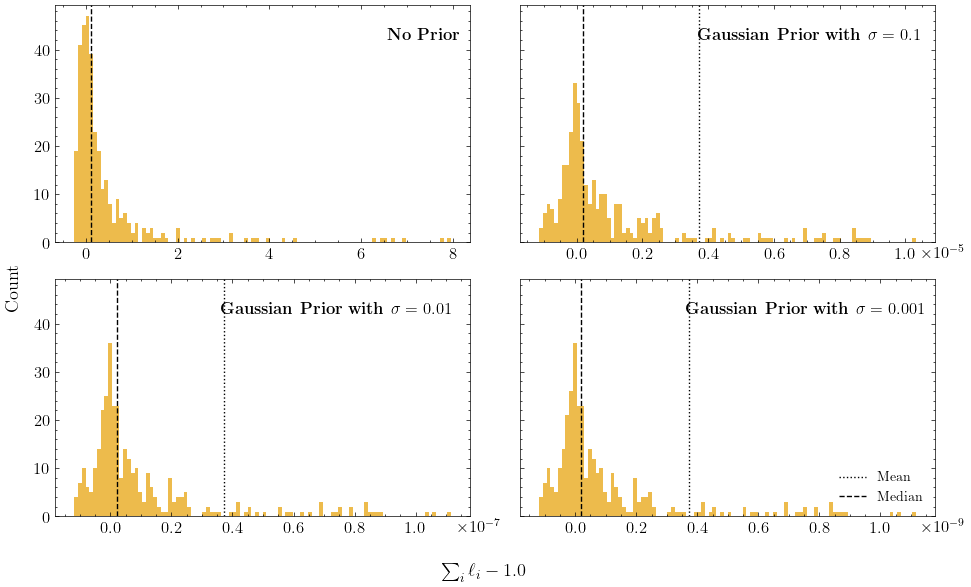

In [5]:
# having a look at some of the distributions
label_sum_none = np.sum(load_data(sigma=None), axis=1)
label_sum_0_1 = np.sum(load_data(sigma="0_1"), axis=1)
label_sum_0_0_1 = np.sum(load_data(sigma="0_0_1"), axis=1)
label_sum_0_0_0_1 = np.sum(load_data(sigma="0_0_0_1"), axis=1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
plot_hist(label_sum_none-1, focus_percentile=84, ax=ax[0, 0], plotmean=False)
plot_hist(label_sum_0_1-1, focus_percentile=84, ax=ax[0, 1])
plot_hist(label_sum_0_0_1-1, focus_percentile=84, ax=ax[1, 0])
plot_hist(label_sum_0_0_0_1-1, focus_percentile=84, ax=ax[1, 1])
fig.supxlabel('$\\sum_i\\ell_i-1.0$')
fig.supylabel('Count')
ax[1,1].legend(loc='lower right', fontsize=10)
ax[0,0].text(0.8, 0.9, '\\textbf{No Prior}', transform=ax[0,0].transAxes, fontsize=12, verticalalignment='top')
ax[0,1].text(0.43, 0.9, '\\textbf{Gaussian Prior with $\\sigma=0.1$}', transform=ax[0,1].transAxes, fontsize=12, verticalalignment='top')
ax[1,0].text(0.4, 0.9, '\\textbf{Gaussian Prior with $\\sigma=0.01$}', transform=ax[1,0].transAxes, fontsize=12, verticalalignment='top')
ax[1,1].text(0.4, 0.9, '\\textbf{Gaussian Prior with $\\sigma=0.001$}', transform=ax[1,1].transAxes, fontsize=12, verticalalignment='top')
ax[0,1].xaxis.get_offset_text().set_visible(False)
ax[0,1].text(0.97, -0.01, '$\\times10^{-5}$', transform=ax[0,1].transAxes, fontsize=12, verticalalignment='top')
ax[1,0].xaxis.get_offset_text().set_visible(False)
ax[1,0].text(0.97, -0.01, '$\\times10^{-7}$', transform=ax[1,0].transAxes, fontsize=12, verticalalignment='top')
ax[1,1].xaxis.get_offset_text().set_visible(False)
ax[1,1].text(0.97, -0.01, '$\\times10^{-9}$', transform=ax[1,1].transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.savefig('/home/vmehta/honours-project/thesis/figures/prior_histograms.pdf', format='pdf')

In [9]:
label_sum_0_0_0_1.max()

np.float64(1.0000000332044445)

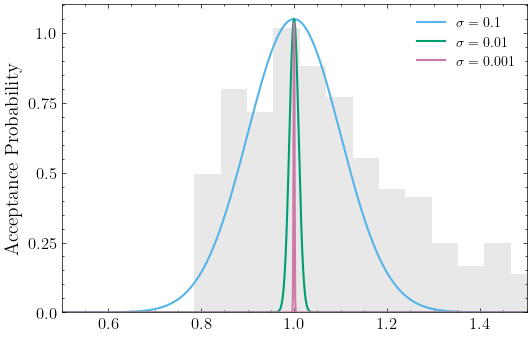

In [22]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )
plot_hist((label_sum_none), bins=80, focus_percentile=80, alpha=0.5, color='lightgray', density=True, plotmean=False, plotmed=False)
x = np.linspace(0.5,1.5,1000)
plt.plot(x, gaussian(x, 1, 0.1)/1.9, 'C1', linewidth=1.5, label='$\\sigma=0.1$')
plt.plot(x, gaussian(x, 1, 0.01)/19, 'C2', linewidth=1.5, label='$\\sigma=0.01$')
plt.plot(x, gaussian(x, 1, 0.001)/170, 'C6', linewidth=1.5, label='$\\sigma=0.001$')
plt.xlim(0.5,1.5)
plt.yticks([0, 0.5, 1, 1.5, 2], ['0.0', '0.25', '0.5', '0.75', '1.0'])
plt.legend(fontsize=10)
plt.ylabel('Acceptance Probability')
plt.show()

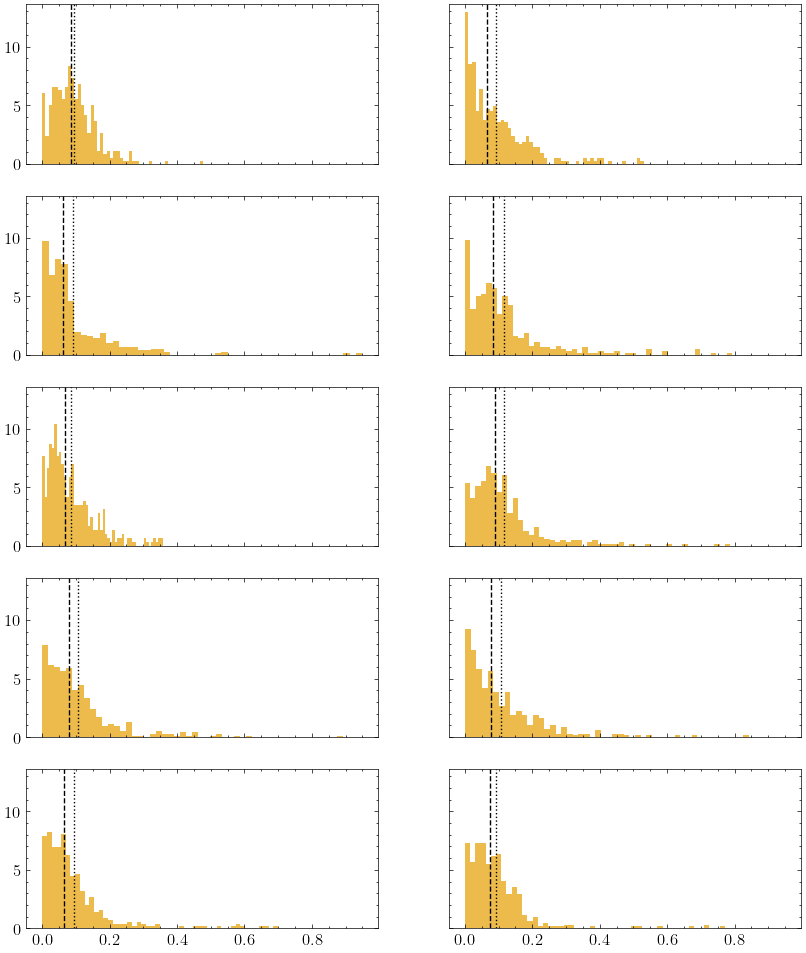

In [16]:
data = load_data(sigma="0_1")
fig, ax = plt.subplots(5, 2, figsize=(10, 12), sharex=True, sharey=True)
for i in range(5):
    plot_hist(data[:,i], ax=ax[i,0], color='C0', alpha=0.7, bins=50, focus_percentile=100, density=True,plotmean=True, plotmed=True)
for i in range(5):
    plot_hist(data[:,i+5], ax=ax[i,1], color='C0', alpha=0.7, bins=50, focus_percentile=100, density=True,plotmean=True, plotmed=True)

In [11]:
load_data(sigma="0_1")[:,0]

array([8.20631394e-02, 8.59185514e-02, 5.92759480e-02, 1.94240553e-01,
       4.94753359e-03, 1.14509261e-01, 7.20462764e-02, 1.07578520e-01,
       1.09918356e-01, 1.45033781e-01, 5.84843252e-02, 1.01405070e-01,
       1.66155647e-01, 5.30581222e-02, 5.05686541e-02, 3.95283407e-02,
       3.29754940e-02, 1.20452099e-01, 1.07060427e-01, 1.34914631e-01,
       1.57891497e-01, 1.00768969e-01, 9.46058467e-02, 3.59623899e-02,
       7.75185435e-02, 8.27997635e-02, 1.09559641e-01, 3.56792287e-02,
       7.98456388e-02, 2.11253676e-02, 6.06461181e-02, 5.63035120e-02,
       1.79659880e-01, 4.51293431e-02, 2.34325229e-02, 8.16026126e-02,
       1.60628152e-01, 5.32777827e-02, 3.32094622e-02, 1.06931378e-01,
       1.18828449e-01, 8.57913453e-02, 7.22325122e-02, 7.34668673e-02,
       3.64730827e-01, 1.08209058e-01, 9.15611394e-02, 7.16904081e-03,
       9.10620606e-02, 3.76645752e-02, 2.75299027e-01, 5.52189754e-02,
       1.49734847e-01, 1.03185143e-01, 8.10985624e-02, 1.46912215e-01,
      